In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
games = pd.read_csv('vgsales.csv', sep=',')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# Drop rows with missing values
games.dropna(inplace=True)

# Merge classes with less than two members into a broader category
games.loc[games['Publisher'].value_counts()[games['Publisher']].values < 2, 'Publisher'] = 'Other'

# Split data into training and test sets, stratifying on the Publisher column
games_train, games_test = train_test_split(games, test_size=0.3, random_state=42, stratify=games['Publisher'])

# Print the shapes of the training and test sets
print(games_train.shape, games_test.shape)


(11403, 11) (4888, 11)


In [3]:
# Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales , JP_Sales, Other_Sales, Global_Sales

In [4]:
from sklearn.tree import DecisionTreeClassifier
# Perform one-hot encoding on the 'Platform' column
one_hot = pd.get_dummies(games['Platform'])

# Concatenate the one-hot encoded columns with the original dataset
games_encoded = pd.concat([games, one_hot], axis=1)

# Select feature variables
features = ['NA_Sales', 'EU_Sales']

# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier(max_depth=2)

# Fit the model on the train set with selected features
dt_classifier.fit(games_train[features], games_train['Genre'])


DecisionTreeClassifier(max_depth=2)

In [6]:
from sklearn.metrics import accuracy_score

# make predictions on the train set
train_predictions = dt_classifier.predict(games_train[features])

# calculate the accuracy of the train set predictions
train_accuracy = accuracy_score(games_train['Genre'], train_predictions)

# make predictions on the test set
test_predictions = dt_classifier.predict(games_test[features])

# calculate the accuracy of the test set predictions
test_accuracy = accuracy_score(games_test['Genre'], test_predictions)

print("Accuracy on train set: ", train_accuracy)
print("Accuracy on test set: ", test_accuracy)


Accuracy on train set:  0.21432956239586073
Accuracy on test set:  0.21092471358428805


I believe there is a small change of it guessing the correct. train set always performs better than the test sets. btu they are still very similar.

In [7]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

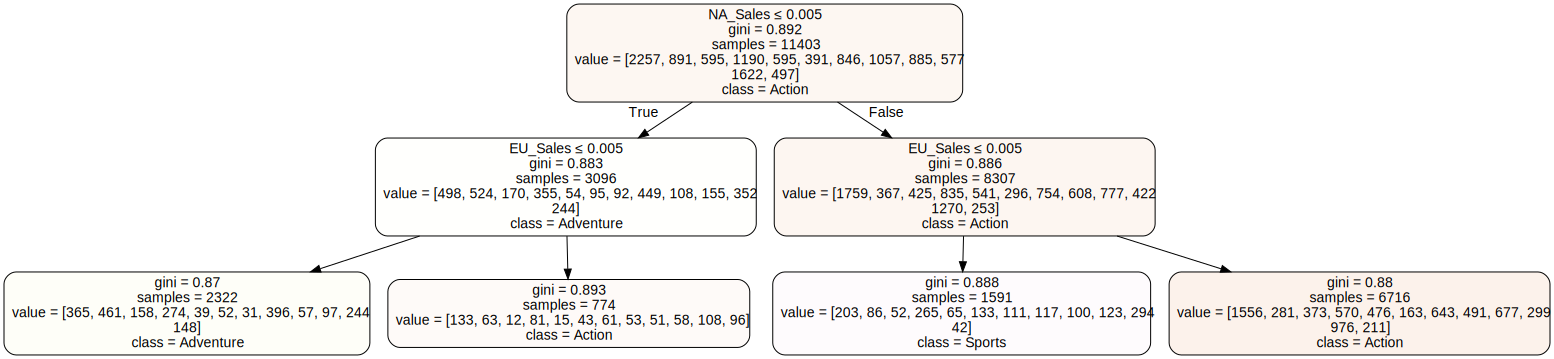

In [8]:
plot_tree_classification(dt_classifier, features, np.sort(games_train.Genre.unique()))

In [9]:
np.sort(games.Genre.unique())

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

My understanding from the tree is that each block asks a question that results into a true or false. The tree splits the samples based on their result. This will repeat untill the given amount of dept variable. At the bottom of the tree it will tell you the prediction class. so this tree is used to predict a genre when for example a the training set is put into this.